# `mlarena.utils.plot_utils` Demo

This notebook serves as a demonstration of the various plotting utilities available in the `mlarena.utils.plot_utils` module. 

In [1]:
import mlarena.utils.plot_utils as put
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# 1. plot_box_scatter()

The `plot_box_scatter()` function creates a boxplot overlaid with scatter points, providing a detailed view of data distribution and outliers. 

It is useful for visualizing the spread, central tendency, and outliers of data across categories, especially when dealing with dense or overlapping data points.

In the demo below, you will see two examples: one with sparse data, and the another with more dense data, demonstrating how the function handles crowded datasets effectively.

## 1.1 Color the box and points by category

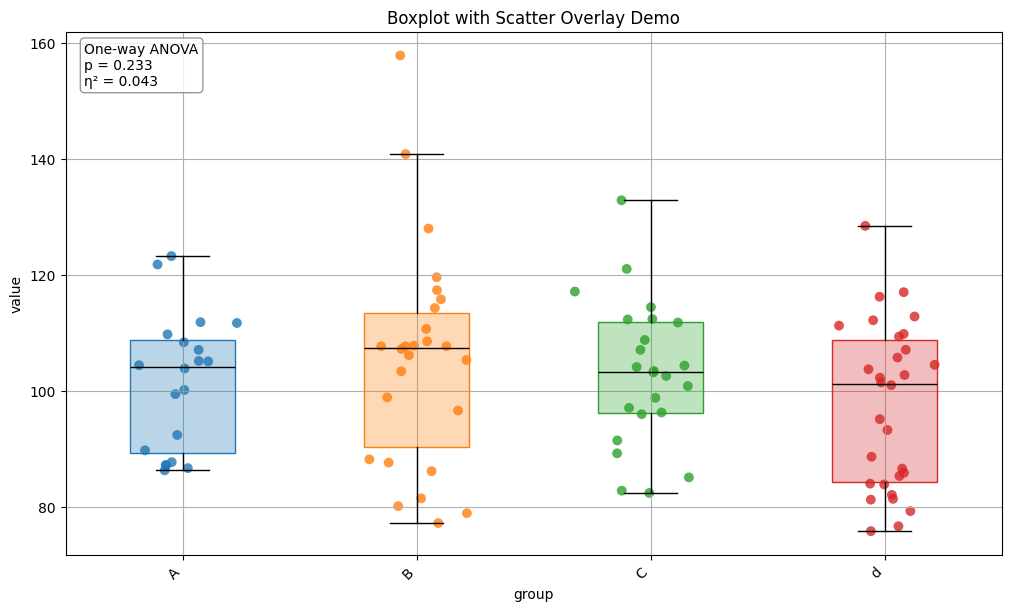

In [13]:
# Set random seed for reproducibility
np.random.seed(42)
# Create synthetic data that is relatively sparse
n = 100
df = pd.DataFrame({
    "group": np.random.choice(["A", "B", "C", "d"], size=n),
    "source": np.random.choice(["Online", "Offline"], p= [0.2, 0.8], size=n),
    "value": np.random.normal(loc=100, scale=15, size=n)
})
# Create boxplot with scatter overlay
fig, ax, results = put.plot_box_scatter(
    data=df,
    x="group",
    y="value",
    point_size=50,
    point_alpha=0.8,
    title="Boxplot with Scatter Overlay Demo",
    stat_test='anova',
    return_stats=True
)

In [5]:
results['summary_table']

,group,n,mean,median,sd
0,A,20,101.490991,104.176506,11.594532
1,B,26,105.455240,107.471938,18.866255
2,C,24,103.175866,103.347606,12.284233
3,d,30,97.534952,101.261608,14.144729


In [6]:
results['stat_test']

{'method': 'anova',
 'statistic': np.float64(1.4514632773391507),
 'p_value': np.float64(0.23272231617106276),
 'effect_size': np.float64(0.04339012811802505)}

## 1.2 Color the points by `point_hue`

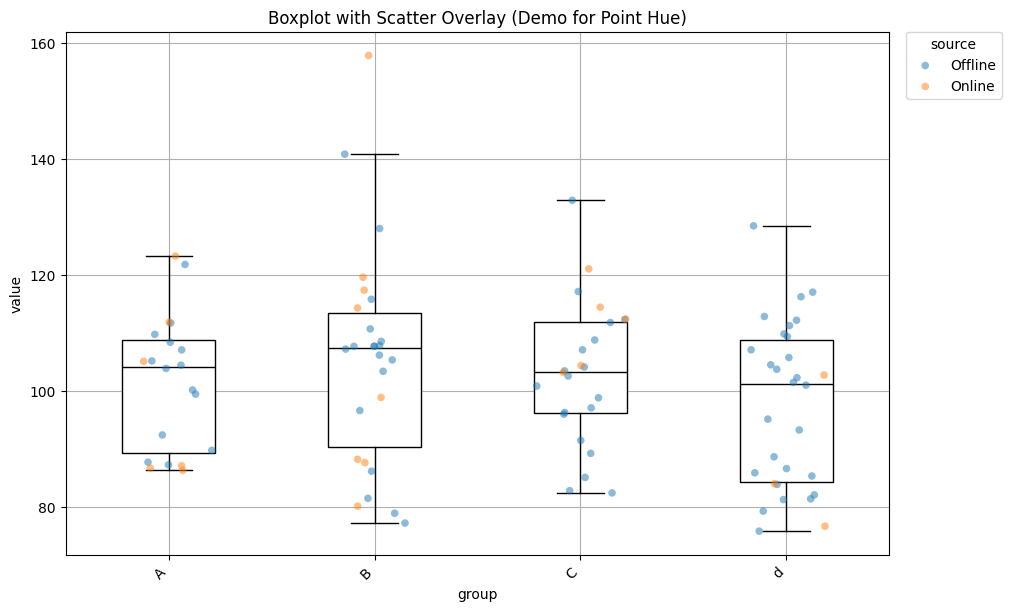

In [7]:
fig, ax = put.plot_box_scatter(
    data=df,
    x="group",
    y="value",
    point_hue="source",
    point_alpha=0.5,
    title="Boxplot with Scatter Overlay (Demo for Point Hue)"
)

## 1.3 Single color option

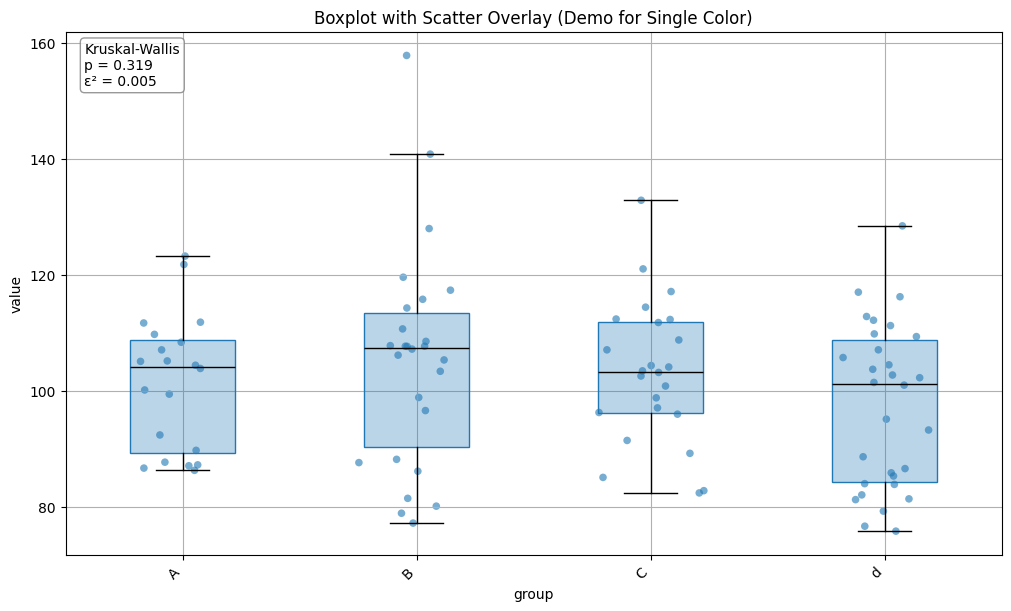

In [9]:
fig, ax = put.plot_box_scatter(
    data=df,
    x="group",
    y="value",
    single_color_box=True,
    title="Boxplot with Scatter Overlay (Demo for Single Color)",
    stat_test='kruskal'
)

## 1.4 Plot very dense data
Below are examples of plots for denser datasets. You can adjust the `point_size` parameter to customize the visualization to your preference.

### 1.4.1 Color by y category

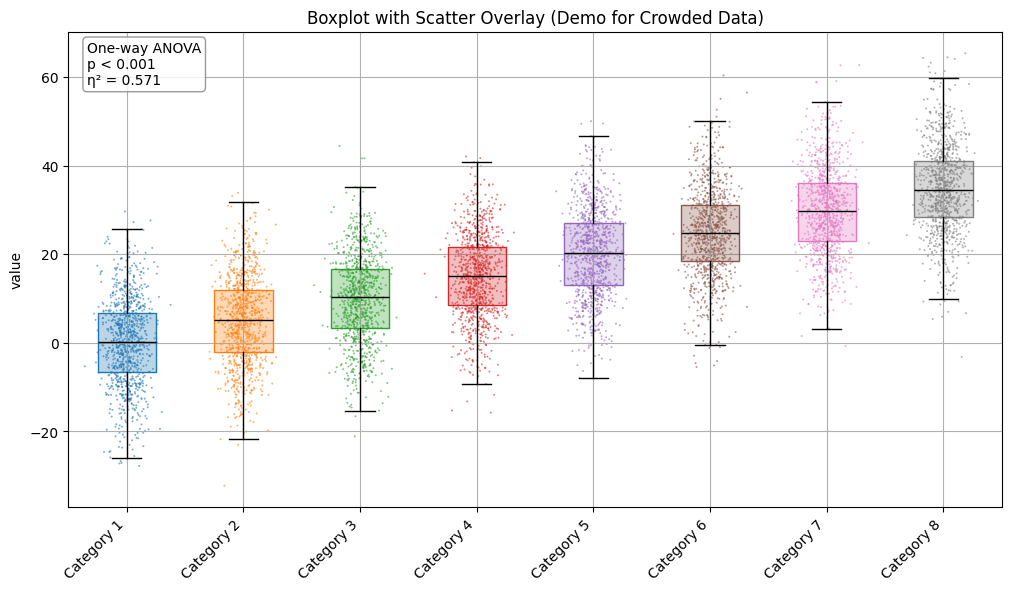

In [18]:
# Create synthetic data that is crowded
num_categories = 8
num_points_per_category = 1000
categories = [f"Category {i + 1}" for i in range(num_categories)]
values = np.concatenate(
    [
        np.random.normal(loc=i * 5, scale=10, size=num_points_per_category)
        for i in range(num_categories)
    ]
)
df_synthetic = pd.DataFrame(
    {"item": np.repeat(categories, num_points_per_category), "value": values}
)
# Create boxplot with scatter overlay
fig, ax = put.plot_box_scatter(
    data=df_synthetic,
    x="item",
    y="value",
    title="Boxplot with Scatter Overlay (Demo for Crowded Data)",
    point_size=2,
    xlabel=" ",
    stat_test='anova'
    )

### 1.4.2 Color by point_hue

In [19]:
n_points = 10000  
n_categories = 5   
categories = [f'Category {i+1}' for i in range(n_categories)]
data = {
    'category': np.random.choice(categories, size=n_points),
    'value': np.random.normal(loc=100, scale=15, size=n_points),
}

# Add two types of point_hue for testing
# 1. Numerical hue 
data['number_hue'] = np.random.choice([0, 1, 2], size=n_points, p=[0.5, 0.3, 0.2])

# 2. Categorical hue 
data['categorical_hue'] = np.random.choice(
    ['Type A', 'Type B', 'Type C'], 
    size=n_points, 
    p=[0.5, 0.3, 0.2]
)


df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         10000 non-null  object 
 1   value            10000 non-null  float64
 2   number_hue       10000 non-null  int64  
 3   categorical_hue  10000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


<Figure size 640x480 with 0 Axes>

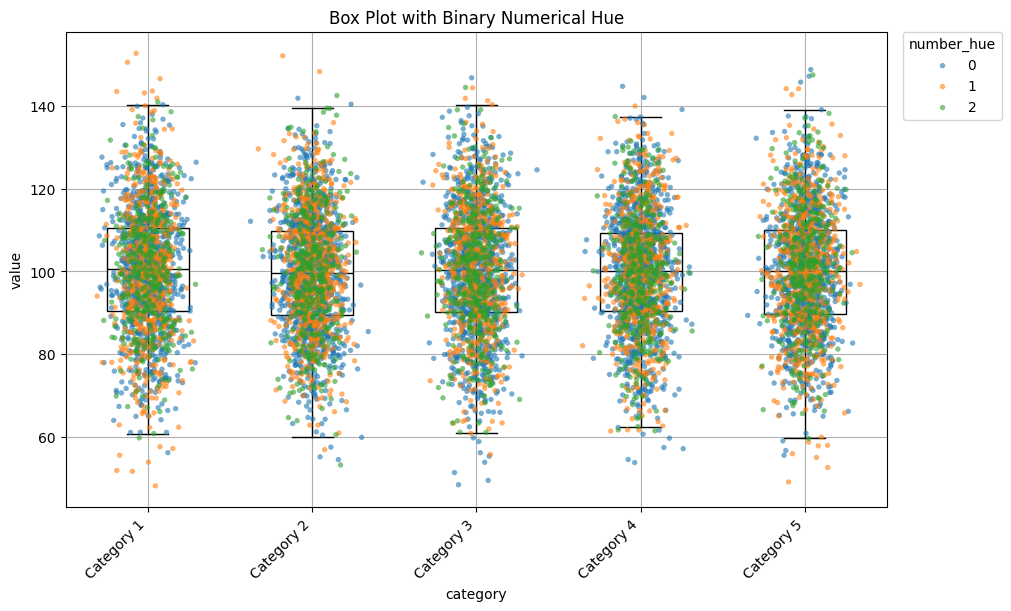

In [20]:
# Test with numerical hue
plt.figure(1)
fig1, ax1 = put.plot_box_scatter(
    data=df,
    x='category',
    y='value',
    point_hue='number_hue',
    point_size=15,
    title='Box Plot with Binary Numerical Hue',
)

<Figure size 640x480 with 0 Axes>

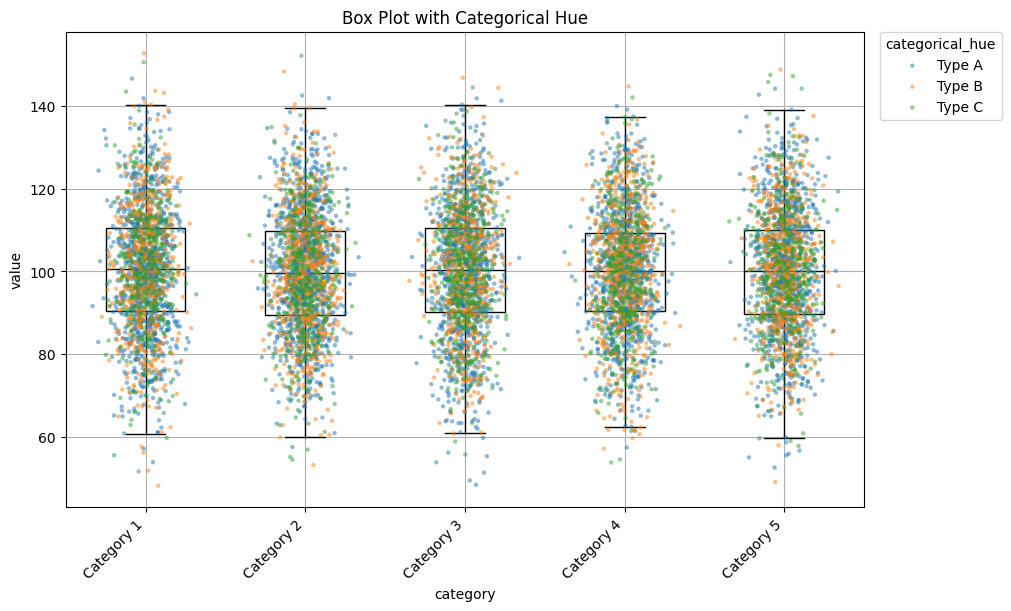

In [21]:
# Test with categorical hue
plt.figure(2)
fig2, ax2 = put.plot_box_scatter(
    data=df,
    x='category',
    y='value',
    point_hue='categorical_hue',
    point_size=10,
    point_alpha=0.5,
    title='Box Plot with Categorical Hue',
)

plt.show()

# 2. plot_metric_event_over_time()

The `plot_metric_event_over_time` function visualizes time-series data with event markers. It's perfect for tracking metrics over time while highlighting important events that might have influenced those metrics.

🔍 Key features:
- Plot multiple metrics on the same timeline with automatic dual y-axis support
- Mark important events with vertical lines and customizable labels
- Smart date formatting that adapts to your data's time range
- Extensive customization options for event styling and label positioning
- Works well with various time scales from hours to years

This function is particularly useful for analyzing the impact of interventions, treatments, or significant events on measured metrics over time.



## 2.1 Example 1: Health metrics and treatments

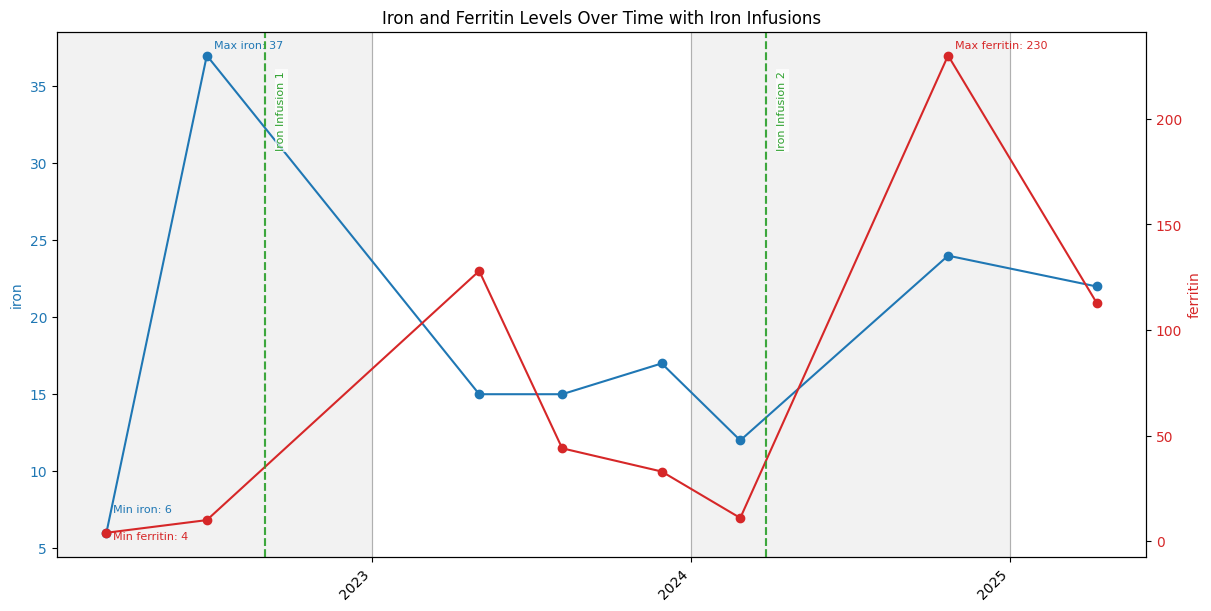

In [22]:

# Example usage:
data = pd.DataFrame(
    {
        "date": [
            "2022-03-03",
            "2022-06-26",
            "2023-05-04",
            "2023-08-07",
            "2023-11-29",
            "2024-02-27",
            "2024-10-22",
            "2025-04-10",
        ],
        "iron": [6, 37, 15, 15, 17, 12, 24, 22],
        "ferritin": [4, 10, 128, 44, 33, 11, 230, 113],
    }
)

metrics = ['iron', 'ferritin']
ylabel = ["Iron", "Ferritin"]

treatments = {"Iron Infusion": ["2022-09-01", "2024-03-28"]}

fig, axes = put.plot_metric_event_over_time(
    data=data,
    x="date",
    y=['iron', 'ferritin'],
    event_dates=treatments,
    title="Iron and Ferritin Levels Over Time with Iron Infusions"
)

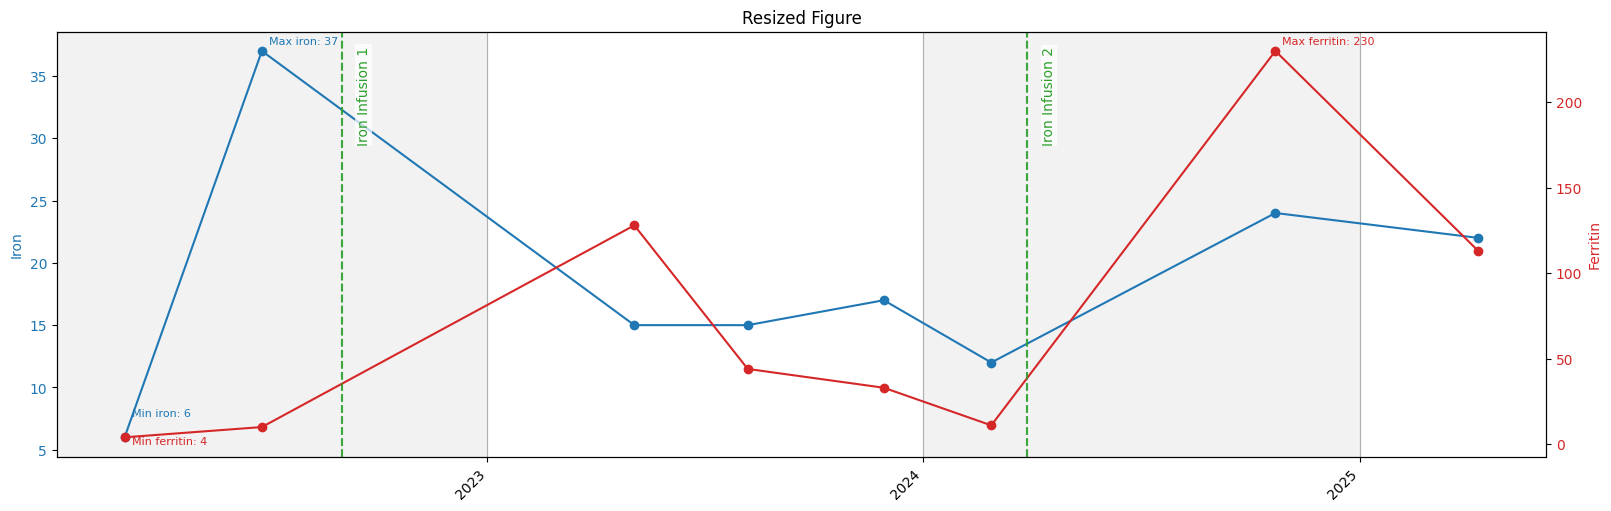

In [23]:
# further customize the figure if desired
fig, axes = put.plot_metric_event_over_time(
    data=data,
    x="date",
    y=metrics,
    ylabel=ylabel,
    event_dates=treatments,
    title = "Iron and Ferritin Levels Over Time with Iron Infusions",
    event_label_x_offset=0.01,
    event_label_fontsize=10
)

axes[1].set_title("Resized Figure")
fig.set_size_inches(16, 5)
# fig.savefig('medical_plot.png', dpi=300, bbox_inches='tight')
plt.show() 


## 2.2 Example 2: Financial metrics and market events

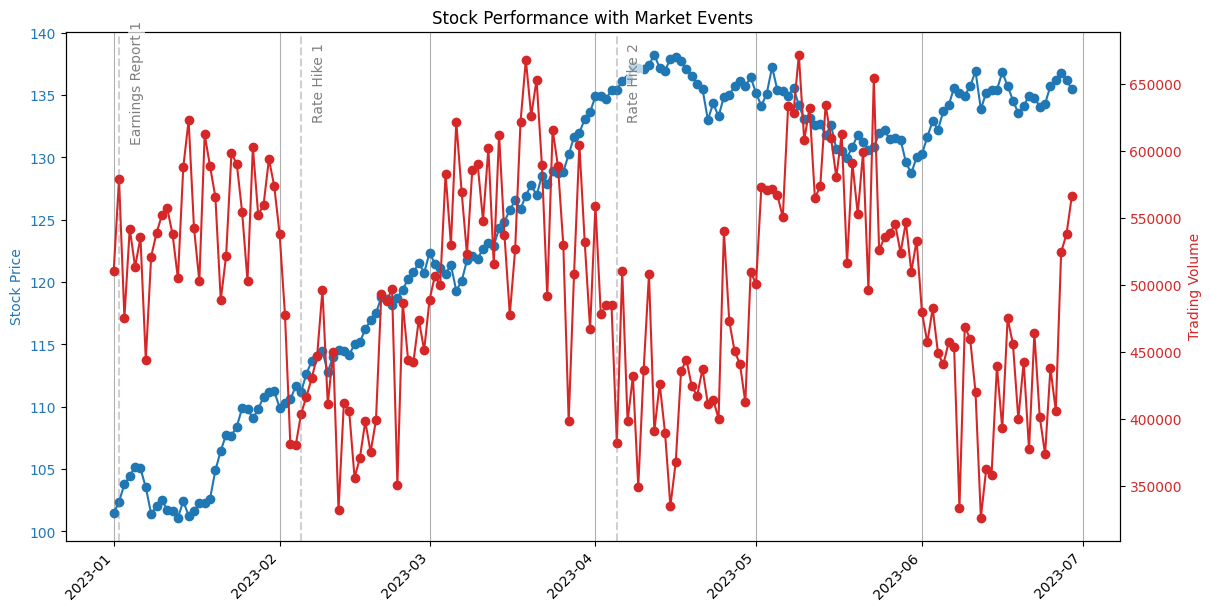

In [24]:
# Generate dates (daily data for 2 months)
months = 6
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(30 * months)]

# Generate stock price with trend and some volatility
initial_price = 100
trend = np.linspace(0, 30, len(dates))
volatility = np.random.normal(0, 3, len(dates))
stock_price = initial_price + trend + np.cumsum(volatility) * 0.3

# Generate trading volume with some pattern
base_volume = 500000
volume_trend = np.sin(np.linspace(0, 6*np.pi, len(dates))) * 100000
volume = base_volume + volume_trend + np.random.normal(0, 50000, len(dates))
volume = np.abs(volume)  

# Create DataFrame
finance_data = pd.DataFrame({
    'date': dates,
    'stock_price': stock_price,
    'trading_volume': volume
})

# Define market events
market_events = {
    'Rate Hike': ['2023-02-05','2023-04-05'], 
    'Earnings Report': ['2023-01-02'] 
}

# Plot the data
metrics = ['stock_price', 'trading_volume']
ylabel = ['Stock Price', 'Trading Volume']

fig, axes = put.plot_metric_event_over_time(
    data=finance_data,
    x='date',
    y=metrics,
    ylabel=ylabel,
    event_dates=market_events,
    title="Stock Performance with Market Events",
    show_minmax=False,
    event_line_color="gray",
    event_label_fontsize=10,
    event_label_color="gray", 
    event_line_alpha=0.2,
    event_label_x_offset=0.01,
    event_label_y_pos=0.9,
    event_label_background=True
)

# plt.savefig('financial_metrics_events.png')
plt.show()

## 2.3 Auto-detection of X-axis time unit labels based on date range

This function intelligently formats date labels based on the timespan of your data, it displays:

- hourly format for short spans (≤3 days) 
- daily format for medium spans (≤60 days)
- monthly format for longer spans (≤1 year)
- quarterly format for multi-year data (≤3 years)
- yearly format for the longest timespans (>3 years)

Also, manual override with the `date_format` parameter is supported when needed. In the example below, when the date range is 60 days, the x-axis date label automatically switched to days. ⏱


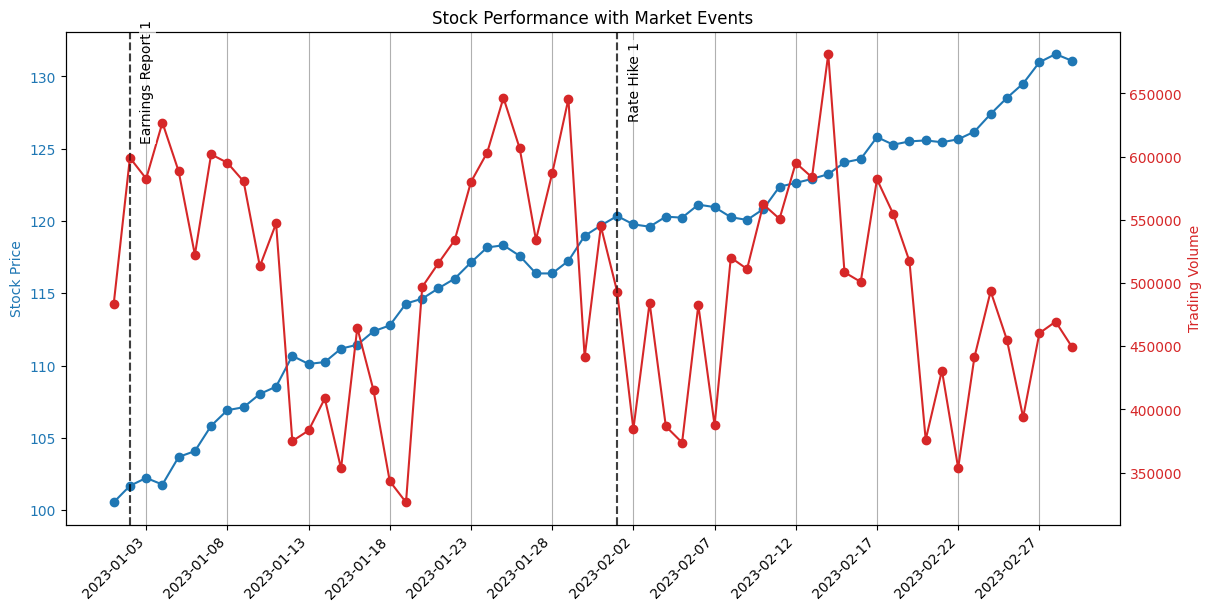

In [25]:
# Generate dates (daily data for 2 months)
months = 2
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(30 * months)]

# Generate stock price with trend and some volatility
initial_price = 100
trend = np.linspace(0, 30, len(dates))
volatility = np.random.normal(0, 3, len(dates))
stock_price = initial_price + trend + np.cumsum(volatility) * 0.3

# Generate trading volume with some pattern
base_volume = 500000
volume_trend = np.sin(np.linspace(0, 6*np.pi, len(dates))) * 100000
volume = base_volume + volume_trend + np.random.normal(0, 50000, len(dates))
volume = np.abs(volume)  

# Create DataFrame
finance_data = pd.DataFrame({
    'date': dates,
    'stock_price': stock_price,
    'trading_volume': volume
})

# Define market events
market_events = {
    'Rate Hike': ['2023-02-01'], 
    'Earnings Report': ['2023-01-02'] 
}

# Plot the data
fig, axes = put.plot_metric_event_over_time(
    data=finance_data,
    x='date',
    y=metrics,
    ylabel=ylabel,
    event_dates=market_events,
    title="Stock Performance with Market Events",
    show_minmax=False,
    event_line_color="black",
    event_label_fontsize=10,
    event_label_color="black", 
    event_line_alpha=0.5,
    event_label_x_offset=0.01,
    event_label_y_pos=0.9,
    event_label_background=True
)

plt.show()

# 3. plot_stacked_bar_over_time()

The `plot_stacked_bar_over_time()` function:

* Creates stacked bar charts showing how different categories are distributed over time
* Can display either raw counts or percentages
* Smart time granularity control 
  - `freq` parameter to specify time aggregation frequency
  - Automatic data grouping and date formatting based on selected frequency
  - Supports multiple time frequencies:
    - 'm' for minutes
    - 'h' for hours
    - 'D' for days
    - 'ME'/'MS' for month end/start
    - 'YE'/'YS' for year end/start
  - Default frequency set to be 'MS'


In [26]:
# Create synthetic data
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="MS")
categories = ['Yes', 'No']
data = []

for date in dates:
    n = np.random.randint(50, 150)
    for _ in range(n):
        data.append({
            'end_date': date,
            'isFraud': np.random.choice(categories, p=[0.3, 0.7])  # 30% fraud, 70% not
        })

# Convert to DataFrame
df_synthetic = pd.DataFrame(data)

# Preview
print(df_synthetic.head())

    end_date isFraud
0 2023-01-01      No
1 2023-01-01      No
2 2023-01-01     Yes
3 2023-01-01      No
4 2023-01-01     Yes


### 3.1 Stacked bar showing percentage

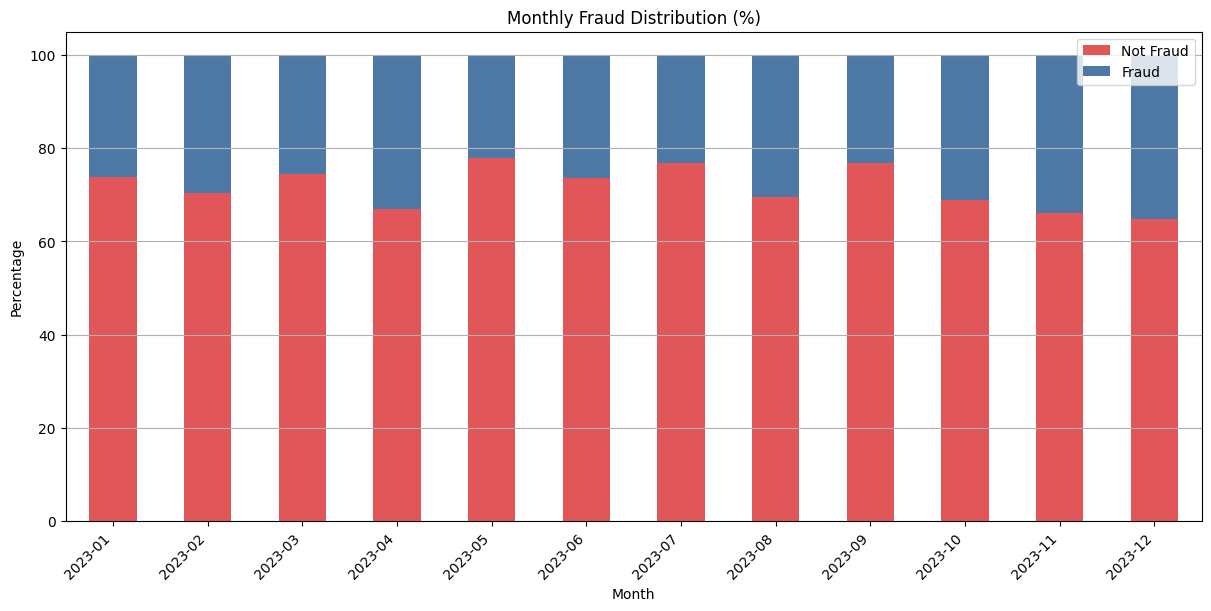

In [27]:
fig, ax = put.plot_stacked_bar_over_time(
    data=df_synthetic,
    x='end_date',
    y='isFraud',
    is_pct=True,
    label_dict={'Yes': 'Fraud', 'No': 'Not Fraud'},
    title='Monthly Fraud Distribution (%)',
    xlabel='',
    palette=['#E15759', '#4E79A7'] # CoralRed, SteelBlue
)
plt.show()

### 3.2 Stached bar showing actual counts

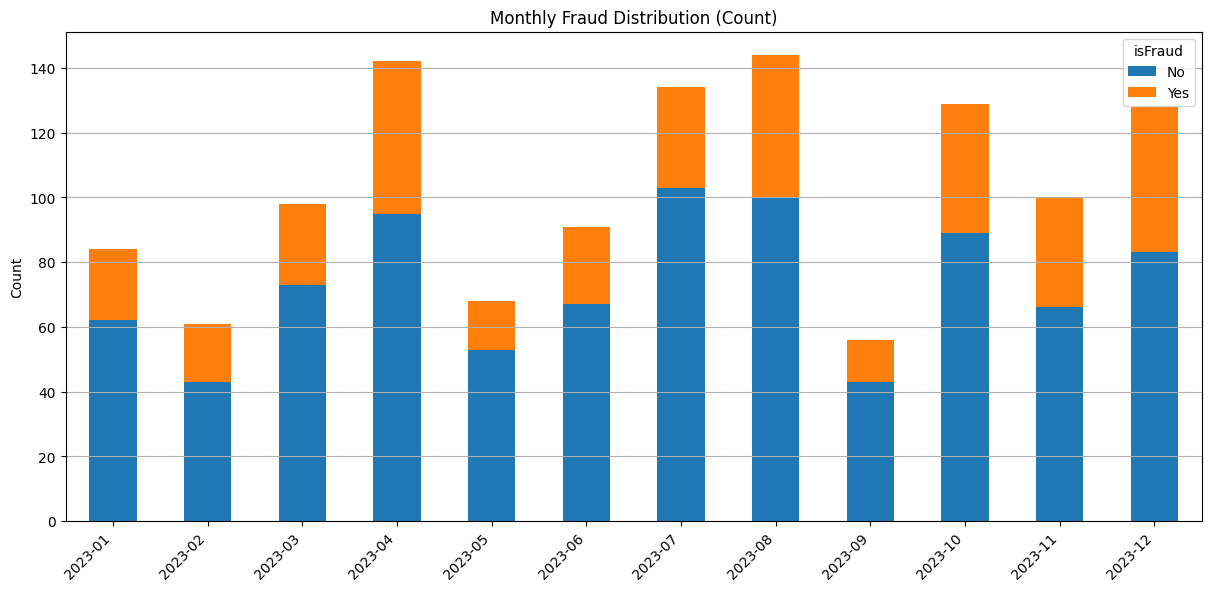

In [28]:
# automatically group data and format X-axis lable by specified granularity
fig, ax = put.plot_stacked_bar_over_time(
    data=df_synthetic,
    x='end_date',
    y='isFraud',
    is_pct=False,
    freq="MS", # specify granularity 
    title='Monthly Fraud Distribution (Count)',
    xlabel=' ',
)

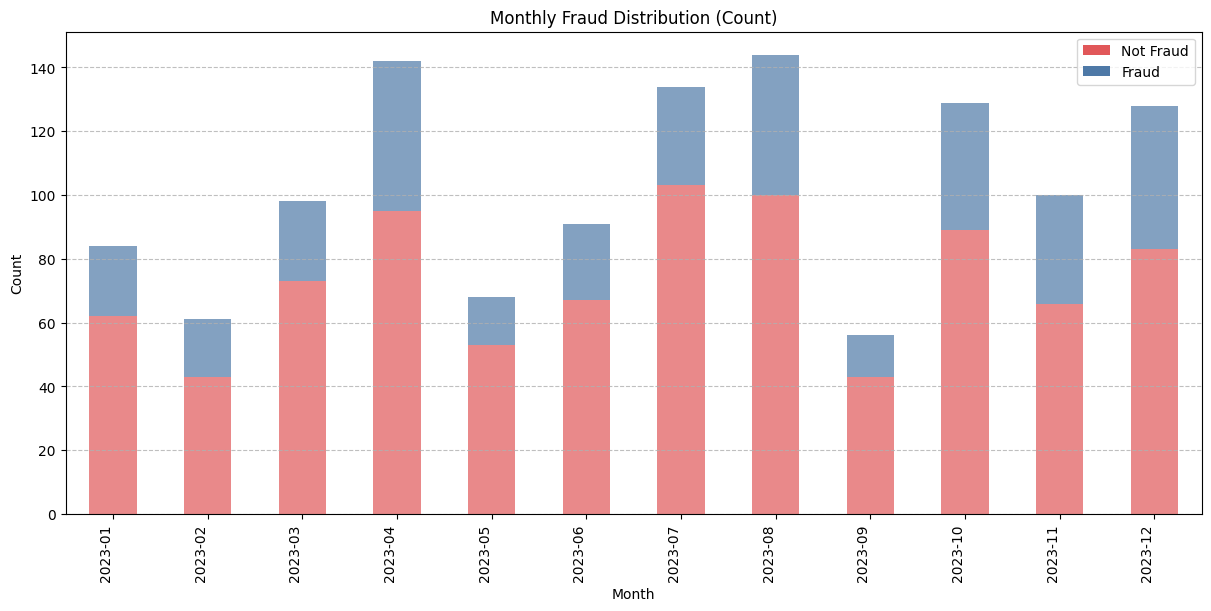

In [29]:
fig, ax = put.plot_stacked_bar_over_time(
    data=df_synthetic,
    x='end_date',
    y='isFraud',
    is_pct=False,
    label_dict={'Yes': 'Fraud', 'No': 'Not Fraud'},
    title='Monthly Fraud Distribution (Count)',
    xlabel='',
    palette=['#E15759', '#4E79A7'] 
)

# Customize grid style to be dashed with alpha
ax.grid(True, axis="y", linestyle='--', alpha=0.8)
# Adjust X-axis angle
ax.tick_params(axis='x', labelrotation=90)
# Customize bar transparency
for container in ax.containers:
    for bar in container:
        bar.set_alpha(0.7)  

### 3.3 Set time gratularity to the hour

Use the `freq` parameter to determine the time gratularity for the plot: 
- 'H'=hour
- 'D'=day
- 'M'=month
- 'Y'=year

In [30]:
# Define activity patterns
activity_patterns = {
    'business': {
        'hours': (9, 17),
        'activities': ['Work', 'Meeting', 'Break'],
        'probs': [0.6, 0.3, 0.1]
    },
    'evening': {
        'hours': (18, 22),
        'activities': ['Leisure', 'Dinner', 'Exercise'],
        'probs': [0.5, 0.3, 0.2]
    },
    'night': {
        'hours': (0, 8),
        'activities': ['Sleep', 'Reading', 'Other'],
        'probs': [0.7, 0.2, 0.1]
    }
}

# Generate data
dates = pd.date_range(start='2024-01-01', end='2024-01-01 23:00:00', freq='h')
n_points = len(dates)

# Generate activities
all_activities = []
all_timestamps = []

for hour in dates:
    current_hour = hour.hour
    
    # Determine pattern based on hour
    pattern = next(
        (p for p in activity_patterns.values() 
         if p['hours'][0] <= current_hour <= p['hours'][1]),
        activity_patterns['night']  # default to night pattern
    )
    
    # More activities during business hours, fewer at night
    if 9 <= current_hour <= 17:
        activities_per_hour = np.random.randint(15, 25)  # Busy during work hours
    elif 18 <= current_hour <= 22:
        activities_per_hour = np.random.randint(8, 15)   # Moderate evening activity
    else:
        activities_per_hour = np.random.randint(3, 8)    # Fewer activities at night
    
    # Generate multiple activities for this hour
    hour_activities = np.random.choice(
        pattern['activities'],
        size=activities_per_hour,
        p=pattern['probs']
    )
    
    all_activities.extend(hour_activities)
    all_timestamps.extend([hour] * activities_per_hour)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': all_timestamps,
    'activity': all_activities
})

print(df['activity'].value_counts())

activity
Work        99
Meeting     55
Sleep       38
Break       25
Leisure     23
Dinner      16
Exercise    10
Reading      7
Other        5
Name: count, dtype: int64


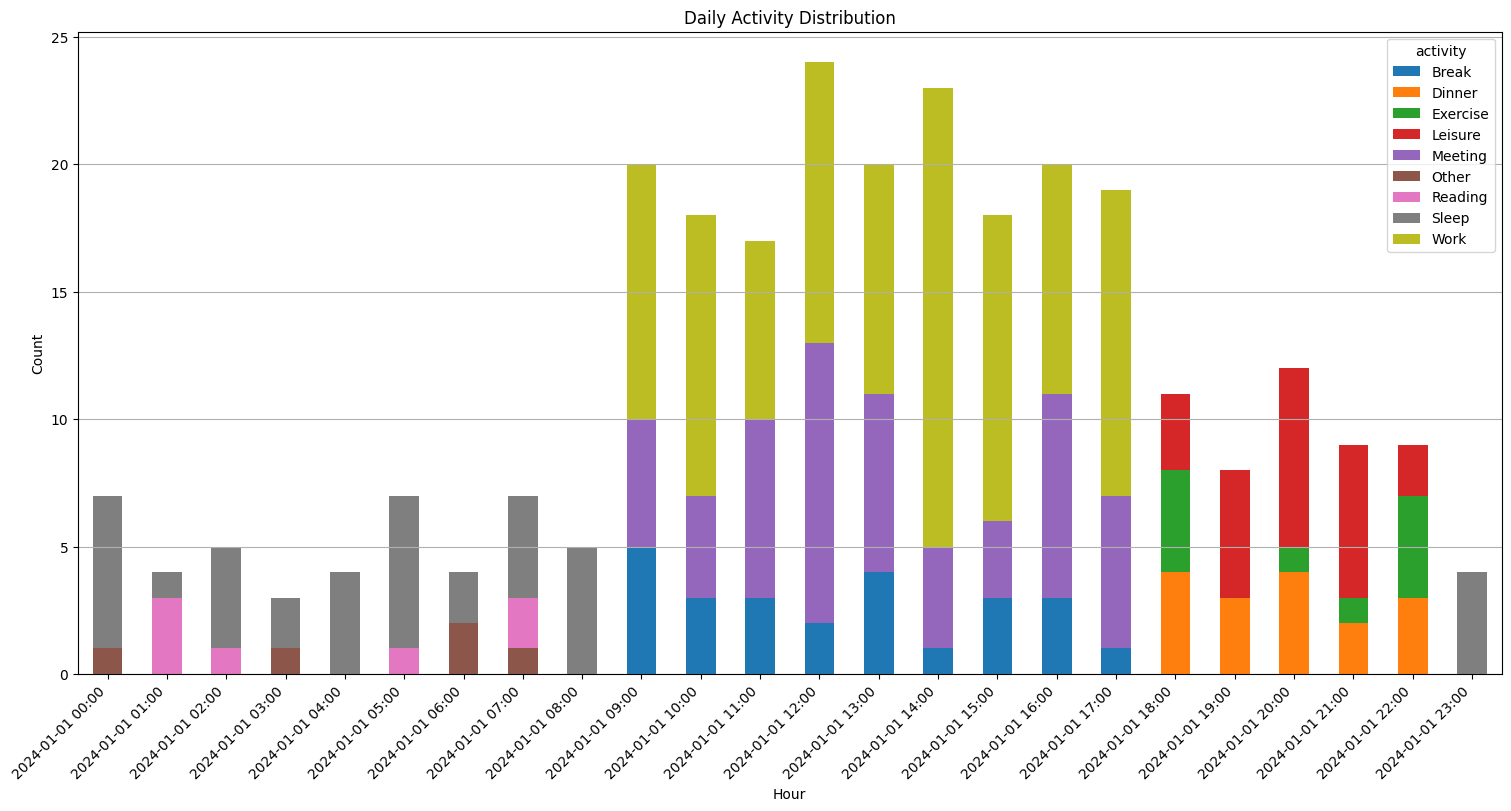

In [31]:
fig, ax = put.plot_stacked_bar_over_time(
    data = df,
    x = 'timestamp',
    y='activity',
    freq='h',
    title='Daily Activity Distribution',
    is_pct=False,
    figsize = (15,8)
)


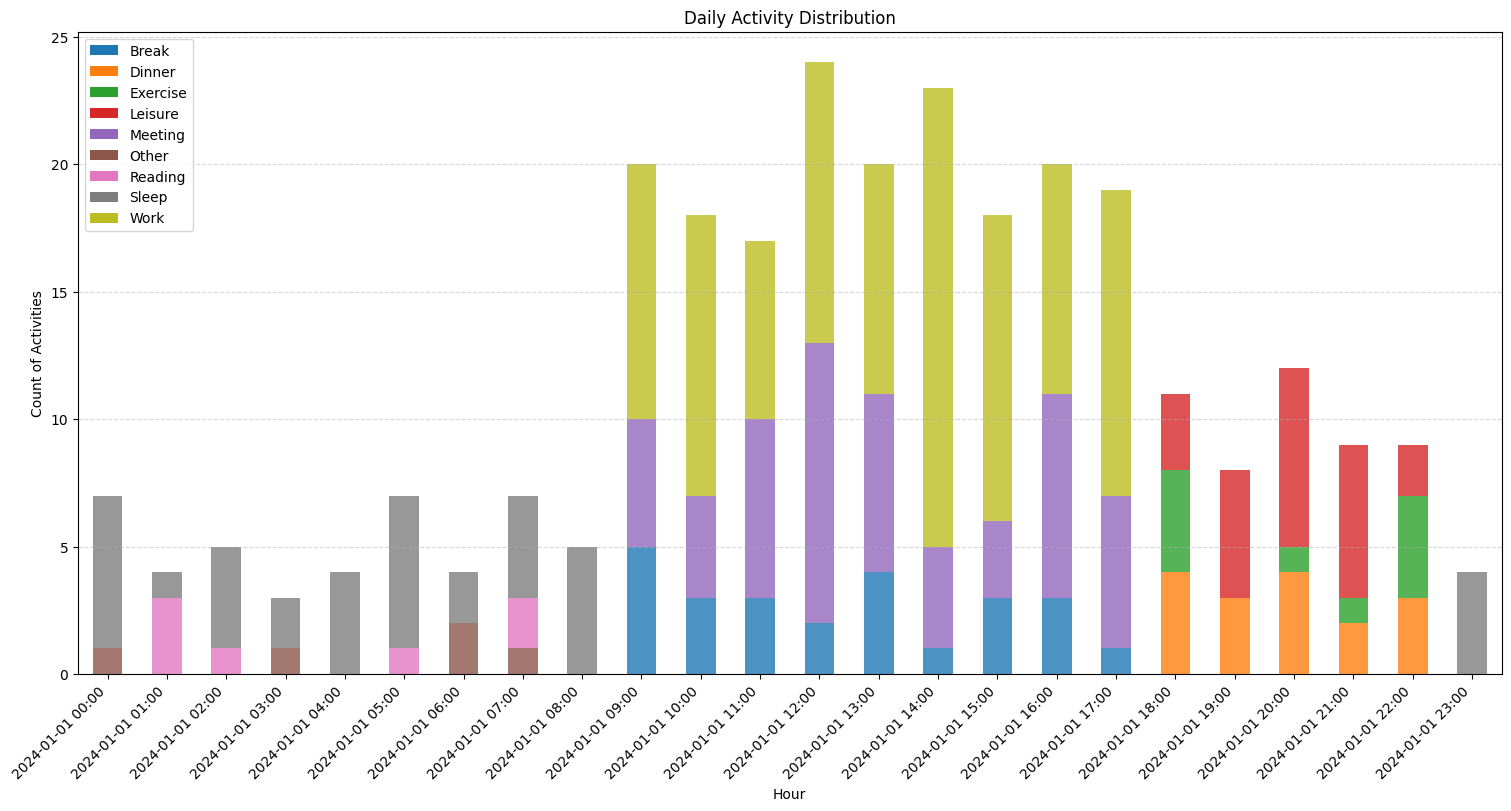

In [32]:
fig, ax = put.plot_stacked_bar_over_time(
    data = df,
    x = 'timestamp',
    y='activity',
    freq='h',
    title='Daily Activity Distribution',
    is_pct=False,
    figsize = (15,8)
)
# cutsomize to our hearts content :) 
ax.legend(loc='upper left')
ax.set_ylabel('Count of Activities')
ax.grid(True, axis="y", linestyle='--', alpha=0.5)
for container in ax.containers:
    for bar in container:
        bar.set_alpha(0.8)  



# 4. plot_distribution_over_time()

This function helps you visualize how the distribution of a continuous variable evolves over time - great for spotting shifts, trends, or anomalies. 

key features include:

- Supports flexible time frequencies - from minutes to years - with automatic aggregation and axis formatting
- Allows coloring points by category with the `point_hue` parameter
- Ensures chronological ordering for accurate trend visualization
- Optionally returns summary stats (count, mean, median, std) for each time window
- Customizable appearance with various styling parameters

In [33]:
# Create datetime range from 6am to 10pm
date = '2025-03-15'
start_time = pd.Timestamp(f'{date} 06:00:00')
end_time = pd.Timestamp(f'{date} 22:00:00')
time_range = pd.date_range(start=start_time, end=end_time, freq='h')

# Define activity patterns with different heart rate distributions
activity_patterns = {
    'morning': {
        'hours': (6, 9),
        'activities': ['Walking', 'Running', 'Cycling', 'Resting'],
        'probs': [0.3, 0.2, 0.2, 0.3],
        'heart_rate_params': {
            'Walking': {'loc': 85, 'scale': 5},
            'Running': {'loc': 140, 'scale': 10},
            'Cycling': {'loc': 120, 'scale': 8},
            'Resting': {'loc': 70, 'scale': 4}
        }
    },
    'work': {
        'hours': (10, 17),
        'activities': ['Walking', 'Running', 'Cycling', 'Resting'],
        'probs': [0.4, 0.1, 0.1, 0.4],
        'heart_rate_params': {
            'Walking': {'loc': 80, 'scale': 5},
            'Running': {'loc': 130, 'scale': 10},
            'Cycling': {'loc': 110, 'scale': 8},
            'Resting': {'loc': 65, 'scale': 4}
        }
    },
    'evening': {
        'hours': (18, 22),
        'activities': ['Walking', 'Running', 'Cycling', 'Resting'],
        'probs': [0.3, 0.2, 0.2, 0.3],
        'heart_rate_params': {
            'Walking': {'loc': 90, 'scale': 5},
            'Running': {'loc': 145, 'scale': 10},
            'Cycling': {'loc': 125, 'scale': 8},
            'Resting': {'loc': 75, 'scale': 4}
        }
    }
}

# Generate data
all_timestamps = []
all_activities = []
all_heart_rates = []

for hour in time_range:
    current_hour = hour.hour
    
    # Determine pattern based on hour
    pattern = next(
        (p for p in activity_patterns.values() 
         if p['hours'][0] <= current_hour <= p['hours'][1]),
        activity_patterns['morning']  # default to morning pattern
    )
    
    # Generate 10-20 data points for this hour
    n_points = np.random.randint(10, 21)
    
    # Generate activities and heart rates
    activities = np.random.choice(
        pattern['activities'],
        size=n_points,
        p=pattern['probs']
    )
    
    heart_rates = []
    for activity in activities:
        params = pattern['heart_rate_params'][activity]
        heart_rate = np.random.normal(
            loc=params['loc'],
            scale=params['scale']
        )
        # Add some random noise
        heart_rate += np.random.normal(0, 2)
        # Ensure heart rate is within reasonable bounds
        heart_rate = np.clip(heart_rate, 40, 200)
        heart_rates.append(heart_rate)
    
    all_timestamps.extend([hour] * n_points)
    all_activities.extend(activities)
    all_heart_rates.extend(heart_rates)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': all_timestamps,
    'activity': all_activities,
    'heart_rate': all_heart_rates,
    'alert': np.random.choice(['Yes', 'No'], p=[0.1, 0.9], size=len(all_timestamps))
})

df['heart_rate'] = df['heart_rate'].round(0)

print(f"Generated {len(df)} data points from {start_time} to {end_time}")
print("\nFirst few rows of data:")
print(df.head())


Generated 243 data points from 2025-03-15 06:00:00 to 2025-03-15 22:00:00

First few rows of data:
            timestamp activity  heart_rate alert
0 2025-03-15 06:00:00  Walking        82.0   Yes
1 2025-03-15 06:00:00  Cycling       108.0   Yes
2 2025-03-15 06:00:00  Walking        90.0    No
3 2025-03-15 06:00:00  Walking        84.0    No
4 2025-03-15 06:00:00  Resting        56.0    No


In [34]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time_period'] = df['timestamp'].dt.to_period('h')
print("Number of unique time periods:", len(df['time_period'].unique()))

Number of unique time periods: 17


## 4.1 Single color time series

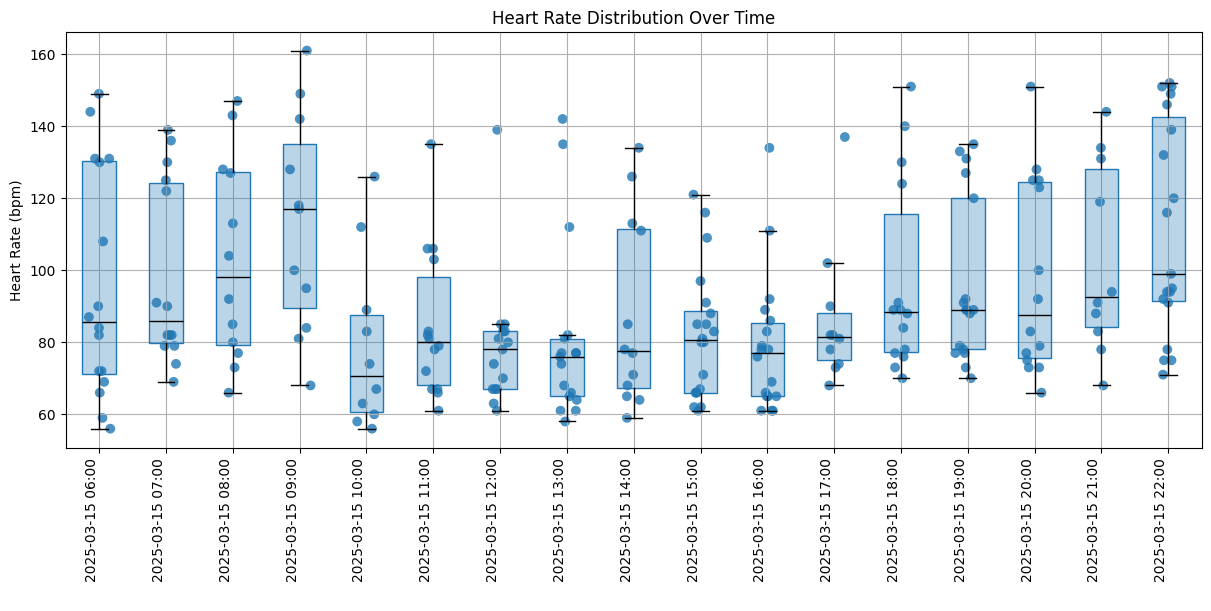

In [35]:
# automatically group data and format X-axis lable by specified granularity
fig, ax = put.plot_distribution_over_time(
    data=df,
    x='timestamp',
    y='heart_rate',
    freq='h',  # specify granularity
    title='Heart Rate Distribution Over Time',
    xlabel=' ',
    ylabel='Heart Rate (bpm)',
)

## 4.2 Color with `point_hue`

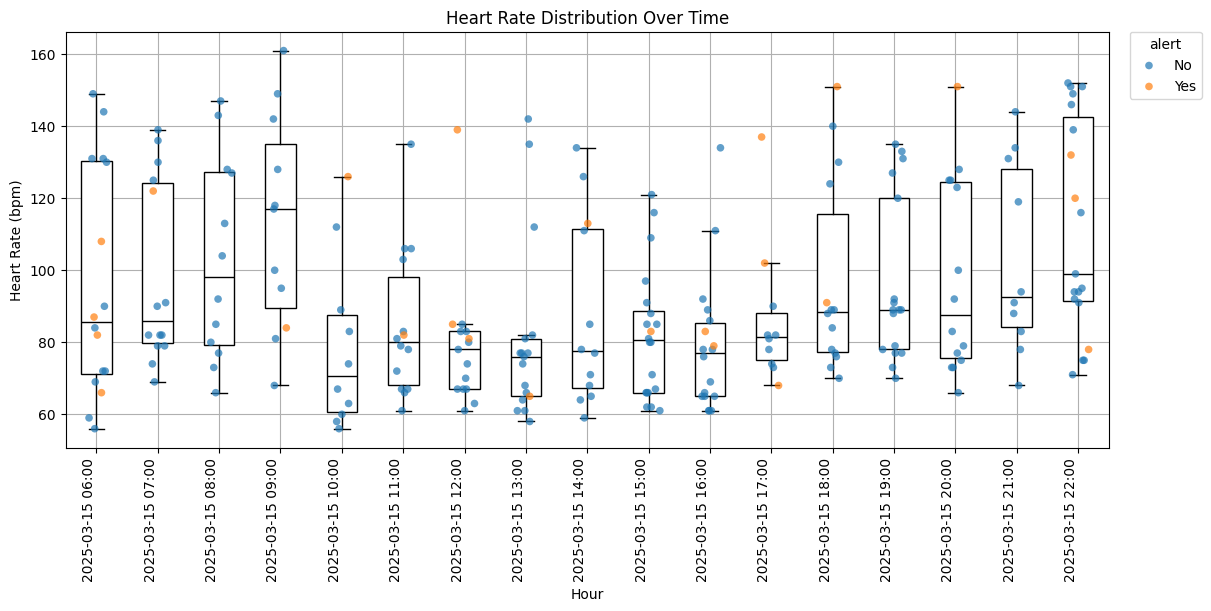

In [36]:
fig, ax = put.plot_distribution_over_time(
    data=df,
    x='timestamp',
    y='heart_rate',
    point_hue='alert',
    freq='h',  # hourly data
    title='Heart Rate Distribution Over Time',
    xlabel='Hour',
    ylabel='Heart Rate (bpm)',
    point_size=30,
    point_alpha=0.7
)

# 5. `plot_stacked_bar()`

The `plot_stacked_bar()` function:

* Creates stacked bar charts showing how different components are distributed across categories
* Can display either raw counts or percentages

## 5.1 Display Percentage

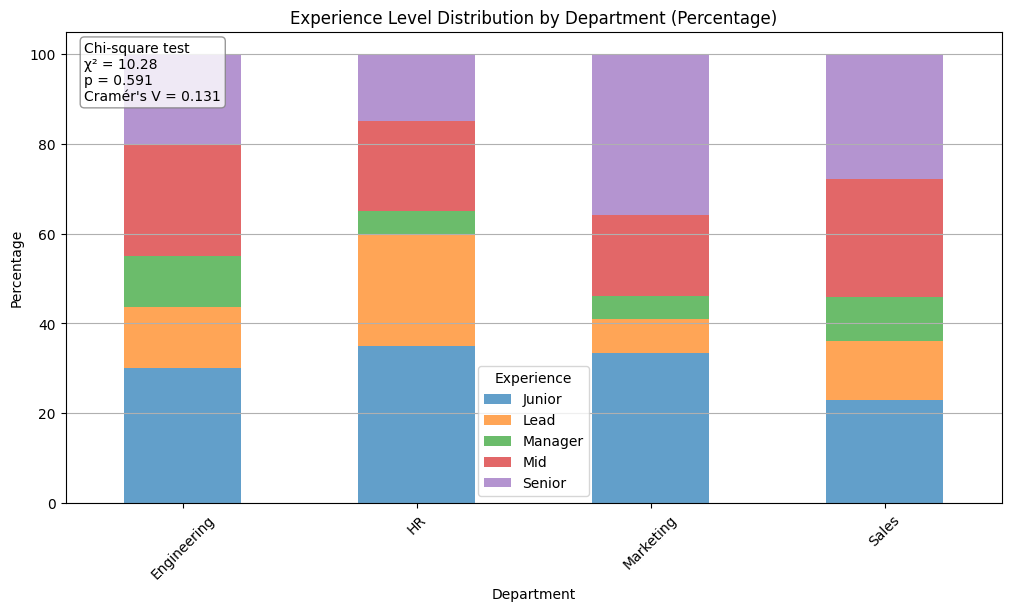

In [38]:
# Create sample data
# Define departments and experience levels
departments = ['Sales', 'Marketing', 'Engineering', 'HR']
experience_levels = ['Junior', 'Mid', 'Senior', 'Lead', 'Manager']
n_rows = 200
data = {
    'Department': np.random.choice(departments, n_rows, p=[0.3, 0.2, 0.4, 0.1]),  
    'Experience': np.random.choice(experience_levels, n_rows, p=[0.3, 0.3, 0.2, 0.15, 0.05]),  
    'Count': np.random.randint(1, 31, n_rows)  
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a label dictionary for better readability
experience_labels = {
    'Junior': 'Junior (< 2 years)',
    'Mid': 'Mid-Level (2-5 years)',
    'Senior': 'Senior (5-8 years)',
    'Lead': 'Lead (8-10 years)',
    'Manager': 'Manager (> 10 years)'
}

# Example 1: Basic stacked bar chart (percentage)
fig1, ax1 = put.plot_stacked_bar(
    data=df,
    x='Department',
    y='Experience',
    title='Experience Level Distribution by Department (Percentage)',
    is_pct=True,
    stat_test="chi2"
)
plt.show()


## 5.2 Display Counts

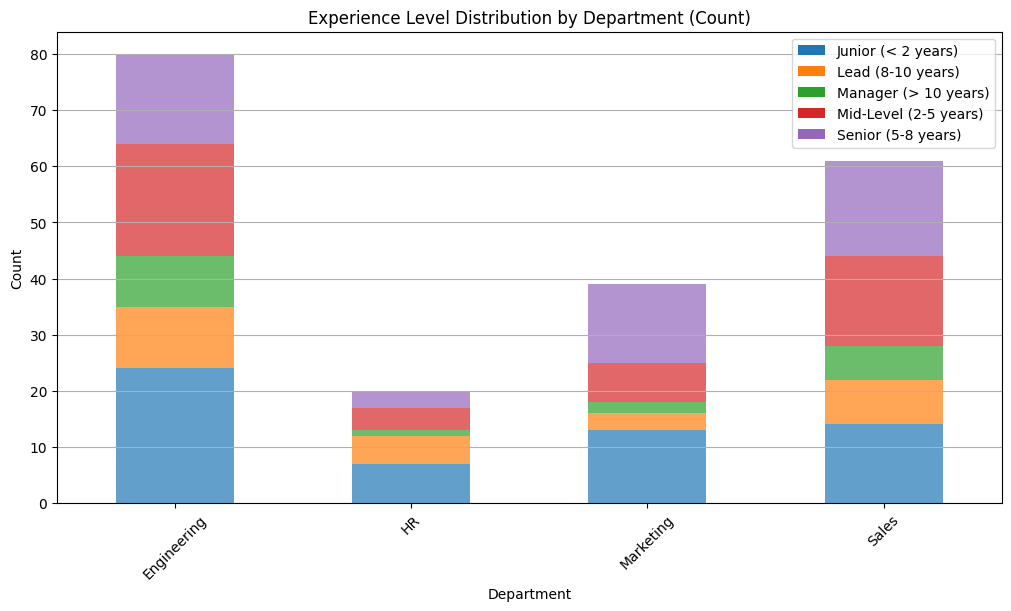

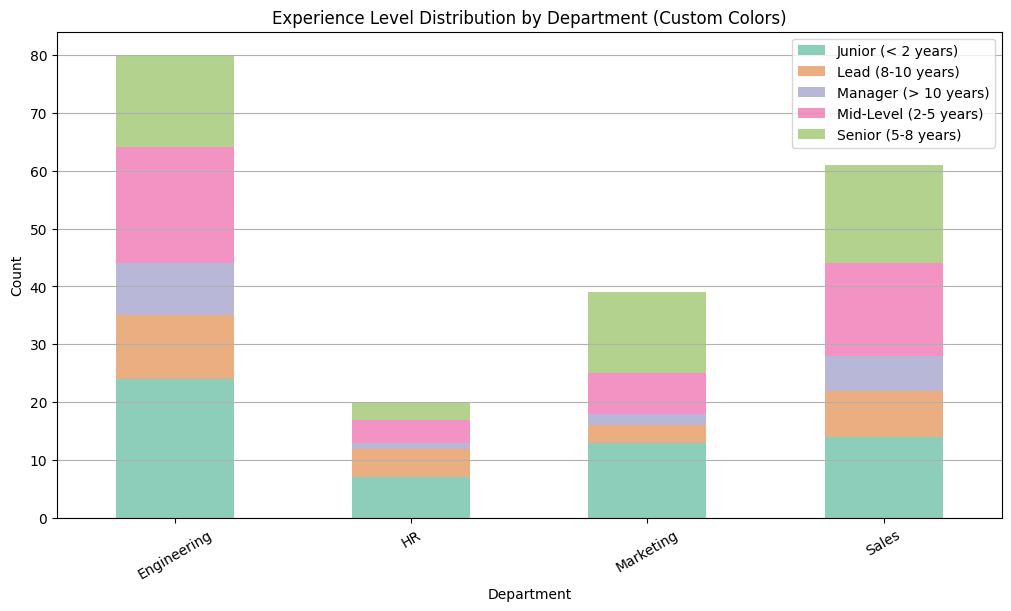

In [39]:
# Example 2: Stacked bar chart with counts
fig2, ax2 = put.plot_stacked_bar(
    data=df,
    x='Department',
    y='Experience',
    title='Experience Level Distribution by Department (Count)',
    is_pct=False,
    label_dict=experience_labels,
    bar_alpha=1
)
# Customize bar transparency
for container in ax2.containers:
    for bar in container:
        bar.set_alpha(0.7) 
plt.show()

# Example 3: Custom colors and rotation
custom_colors = ['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E']
fig3, ax3 = put.plot_stacked_bar(
    data=df,
    x='Department',
    y='Experience',
    title='Experience Level Distribution by Department (Custom Colors)',
    is_pct=False,
    label_dict=experience_labels,
    palette=custom_colors,
    xticklabel_rotation=30,
    bar_alpha=0.5
)

## 5.3 Return and/or Show Stats

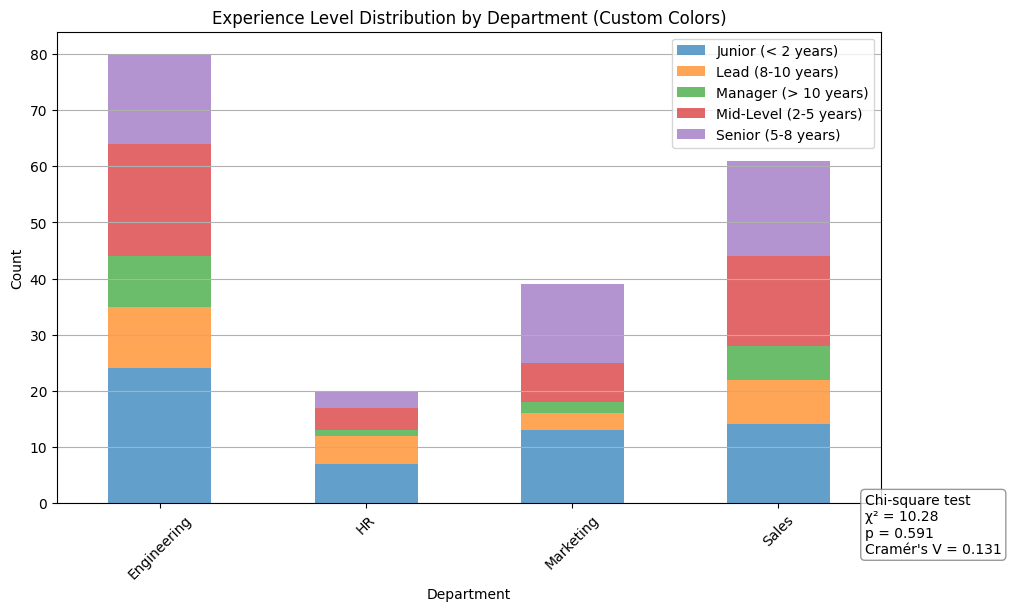

In [42]:
fig3, ax3, results = put.plot_stacked_bar(
    data=df,
    x='Department',
    y='Experience',
    title='Experience Level Distribution by Department (Custom Colors)',
    is_pct=False,
    label_dict=experience_labels,
    stat_test='chi2',
    stat_annotation_pos=[0.98, 0.02],
    return_stats=True
)

In [43]:
results['summary_table']['contingency_table']

Experience,Junior,Lead,Manager,Mid,Senior,Total
Department,,,,,,
Engineering,24,11,9,20,16,80
HR,7,5,1,4,3,20
Marketing,13,3,2,7,14,39
Sales,14,8,6,16,17,61
Total,58,27,18,47,50,200


In [44]:
results['summary_table']['percentage_table']

Experience,Junior,Lead,Manager,Mid,Senior,Total
Department,,,,,,
Engineering,12.0,5.5,4.5,10.0,8.0,40.0
HR,3.5,2.5,0.5,2.0,1.5,10.0
Marketing,6.5,1.5,1.0,3.5,7.0,19.5
Sales,7.0,4.0,3.0,8.0,8.5,30.5
Total,29.0,13.5,9.0,23.5,25.0,100.0


In [45]:
results['stat_test']

{'method': 'chi2',
 'statistic': np.float64(10.283751423293538),
 'p_value': np.float64(0.5910825572708196),
 'effect_size': np.float64(0.13091824053770823),
 'degrees_of_freedom': 12}

# 6. Notes on Stats


## 6.1 Numeric DV across Categorical IV

| Criterion                    | ANOVA （`anova`)    | Kruskal-Wallis (`kruskal`)    |
| ---------------------------- | -------- | ------------------ |
| **Assumptions**              |          |                    |
| Assumes normality            | ✅ Yes    | ❌ No               |
| Assumes equal variances      | ✅ Yes    | ❌ No               |
| **Robustness**               |          |                    |
| Handles outliers well        | ❌ No     | ✅ Yes              |
| Handles unequal group sizes  | ✅ Yes    | ✅ Yes              |
| **Data & Detection**         |          |                    |
| Data type                    | Numeric  | Numeric or ordinal |
| Detects differences in       | Means    | Medians (ranks)    |
| **Performance**              |          |                    |
| Power (when assumptions met) | ✅ Higher | 🔸 Lower           |
| Power (with violations)      | 🔸 Lower | ✅ Higher           |
| **Effect Size**              |          |                    |
| Effect size measure          | η² (eta squared) | ε² (epsilon squared) |
| Interpretation              | Variance explained | Approximate effect size |
| **When to Use**              |          |                    |
| Best for                    | Normal data, equal variances | Non-normal, outliers, ordinal |


## 6.2 Categorical DV across Categorical IV



| Criterion                    | Chi-square  (`chi2`)                          | G-test Likelihood Ratio  (`g_test`)                                       |
| ---------------------------- | --------------------------------------------- | ------------------------------------------------------------------------- |
| **Sample Size Requirements** | Expected frequency ≥ 5 per cell (recommended) | Expected frequency ≥ 5 per cell (recommended)                             |
| Total sample size            | Large (n > 20 preferred)                      | Large (n > 20 preferred)                                                  |
| **Table Size**               | Any size (r×c)                                | Any size (r×c)                                                            |
| **Statistical Properties**   | Asymptotic                                    | Asymptotic                                                                |
| P-value accuracy             | Approximate (chi-square distribution)         | Approximate (chi-square distribution)                                     |
| **Performance**              |                                               |                                                                           |
| Power (large samples)        | ✅ Higher / Similar                            | ✅ Higher / Similar                                                        |
| Power (small samples)        | 🔸 Lower                                      | 🔸 Lower (slightly better than χ² in some cases)                          |
| **Effect Size**              |                                               |                                                                           |
| Effect size measure          | Cramér's V                                    | Cramér's V                                                                |
| Interpretation               | Association strength (0-1)                    | Association strength (0-1)                                                |
| **When to Use**              |                                               |                                                                           |
| Best for                     | General-purpose test for categorical data     | When likelihood-based models or information-theoretic approach is desired |


## 6.3 Return Stats Only

In [46]:
# Set random seed for reproducibility
np.random.seed(42)
# Create synthetic data that is relatively sparse
n = 100
df = pd.DataFrame({
    "group": np.random.choice(["A", "B", "C", "d"], size=n),
    "source": np.random.choice(["Online", "Offline"], p= [0.2, 0.8], size=n),
    "value": np.random.normal(loc=100, scale=15, size=n)
})
# only return stats
results = put.plot_box_scatter(
    data=df,
    x="group",
    y="value",
    stat_test = 'kruskal',
    stats_only=True 
)

In [47]:
results

{'summary_table':   group   n        mean      median         sd
 0     A  20  101.490991  104.176506  11.594532
 1     B  26  105.455240  107.471938  18.866255
 2     C  24  103.175866  103.347606  12.284233
 3     d  30   97.534952  101.261608  14.144729,
 'stat_test': {'method': 'kruskal',
  'statistic': np.float64(3.5129360243716974),
  'p_value': np.float64(0.31908823340294257),
  'effect_size': np.float64(0.005343083587205181)}}

In [48]:
# Create sample data
# Define departments and experience levels
departments = ['Sales', 'Marketing', 'Engineering', 'HR']
experience_levels = ['Junior', 'Mid', 'Senior', 'Lead', 'Manager']
n_rows = 200
data = {
    'Department': np.random.choice(departments, n_rows, p=[0.3, 0.2, 0.4, 0.1]),  
    'Experience': np.random.choice(experience_levels, n_rows, p=[0.3, 0.3, 0.2, 0.15, 0.05]),  
    'Count': np.random.randint(1, 31, n_rows)  
}

# Create DataFrame
df = pd.DataFrame(data)

results = put.plot_stacked_bar(
    data=df,
    x="Department",
    y='Experience',
    stat_test="chi2",
    stats_only=True
)

In [49]:
results

{'summary_table': {'contingency_table': Experience   Junior  Lead  Manager  Mid  Senior  Total
  Department                                            
  Engineering      27    10        5   25      11     78
  HR                5     4        2    7       4     22
  Marketing        14     5        1   10       8     38
  Sales            19    10        4   18      11     62
  Total            65    29       12   60      34    200,
  'percentage_table': Experience   Junior  Lead  Manager   Mid  Senior  Total
  Department                                             
  Engineering    13.5   5.0      2.5  12.5     5.5   39.0
  HR              2.5   2.0      1.0   3.5     2.0   11.0
  Marketing       7.0   2.5      0.5   5.0     4.0   19.0
  Sales           9.5   5.0      2.0   9.0     5.5   31.0
  Total          32.5  14.5      6.0  30.0    17.0  100.0,
  'sample_size': 200},
 'stat_test': {'method': 'chi2',
  'statistic': np.float64(3.785304586777261),
  'p_value': np.float64(0.9870062